# Use SpatialMap for cell typing

In [1]:
import warnings
warnings.filterwarnings('ignore')

from SpatialMap import SpatialMap

In [2]:
# alpha : Weight of reconstruction loss in pretrain stage. The default is 2.0. Suggested values: 10.0 for CosMx platform, 2.0 for other platforms
# For more details about SpatialMap's parameters, see  SpatialMap.py

model=SpatialMap.SpatialMap(sc_file='./Data/NSCLC_9_1_reference.h5ad',
                            srt_file='./Data/NSCLC_9_1_target.h5ad',
                            alpha=10,
                            hidden_dims = [1024,512],
                            device='cuda:2')

In [3]:
model.pretrain()

Epoch 1, Loss: 10.1335,  CLSLoss: 1.3994, RECLoss: 8.7341, Train_acc: 0.4935
Epoch 2, Loss: 5.0243,  CLSLoss: 0.8196, RECLoss: 4.2047, Train_acc: 0.6729
Epoch 3, Loss: 3.1155,  CLSLoss: 0.5406, RECLoss: 2.5749, Train_acc: 0.7659
Epoch 4, Loss: 2.4371,  CLSLoss: 0.3992, RECLoss: 2.0379, Train_acc: 0.8102
Epoch 5, Loss: 1.9834,  CLSLoss: 0.3035, RECLoss: 1.6799, Train_acc: 0.8396
Epoch 6, Loss: 1.6884,  CLSLoss: 0.2418, RECLoss: 1.4466, Train_acc: 0.8627
Epoch 7, Loss: 1.4855,  CLSLoss: 0.2031, RECLoss: 1.2824, Train_acc: 0.8813
Epoch 8, Loss: 1.3161,  CLSLoss: 0.1773, RECLoss: 1.1388, Train_acc: 0.8940
Epoch 9, Loss: 1.1822,  CLSLoss: 0.1574, RECLoss: 1.0247, Train_acc: 0.9038
Epoch 10, Loss: 1.0845,  CLSLoss: 0.1434, RECLoss: 0.9411, Train_acc: 0.9092
Epoch 11, Loss: 1.0021,  CLSLoss: 0.1351, RECLoss: 0.8670, Train_acc: 0.9141
Epoch 12, Loss: 0.9362,  CLSLoss: 0.1253, RECLoss: 0.8109, Train_acc: 0.9183
Epoch 13, Loss: 0.8784,  CLSLoss: 0.1185, RECLoss: 0.7599, Train_acc: 0.9209
Epoch 1

In [4]:
model.pseudo_label()

(array([-1, -1, -1, ..., -1, -1, -1]),
 array([False, False, False, ..., False, False, False]))

In [5]:
pre=model.annotate()

Computing METIS partitioning...
Done!


Epoch 1, Loss: 2.4429
Epoch 2, Loss: 1.6335
Epoch 3, Loss: 1.0980
Epoch 4, Loss: 0.8384
Epoch 5, Loss: 0.7029
Epoch 6, Loss: 0.5997
Epoch 7, Loss: 0.5289
Epoch 8, Loss: 0.4746
Epoch 9, Loss: 0.4254
Epoch 10, Loss: 0.3878
Epoch 11, Loss: 0.3526
Epoch 12, Loss: 0.3227
Epoch 13, Loss: 0.3002
Epoch 14, Loss: 0.2781
Epoch 15, Loss: 0.2591
Epoch 16, Loss: 0.2416
Epoch 17, Loss: 0.2269
Epoch 18, Loss: 0.2132
Epoch 19, Loss: 0.1999
Epoch 20, Loss: 0.1893
Epoch 21, Loss: 0.1795
Epoch 22, Loss: 0.1704
Epoch 23, Loss: 0.1618
Epoch 24, Loss: 0.1535
Epoch 25, Loss: 0.1458
Epoch 26, Loss: 0.1395
Epoch 27, Loss: 0.1326
Epoch 28, Loss: 0.1268
Epoch 29, Loss: 0.1214
Epoch 30, Loss: 0.1156
Epoch 31, Loss: 0.1111
Epoch 32, Loss: 0.1072
Epoch 33, Loss: 0.1026
Epoch 34, Loss: 0.0986
Epoch 35, Loss: 0.0948
Epoch 36, Loss: 0.0913
Epoch 37, Loss: 0.0884
Epoch 38, Loss: 0.0853
Epoch 39, Loss: 0.0824
Epoch 40, Loss: 0.0793
Epoch 41, Loss: 0.0768
Epoch 42, Loss: 0.0742
Epoch 43, Loss: 0.0721
Epoch 44, Loss: 0.06

# Assessment

In [6]:
import scanpy as sc
import numpy as np
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import f1_score

adata=sc.read_h5ad('./Data/NSCLC_9_1_target.h5ad')
all_label=np.array(adata.obs['label'])
acc = (pre == all_label).sum() / len(all_label)
ARI=adjusted_rand_score(all_label,pre)
NMI = normalized_mutual_info_score(all_label, pre)
F1 = f1_score(all_label,pre,average='macro')
print(acc,ARI,NMI,F1)

0.7921866269323896 0.8571127680437454 0.6532122245622092 0.456168312225752


# Visualization

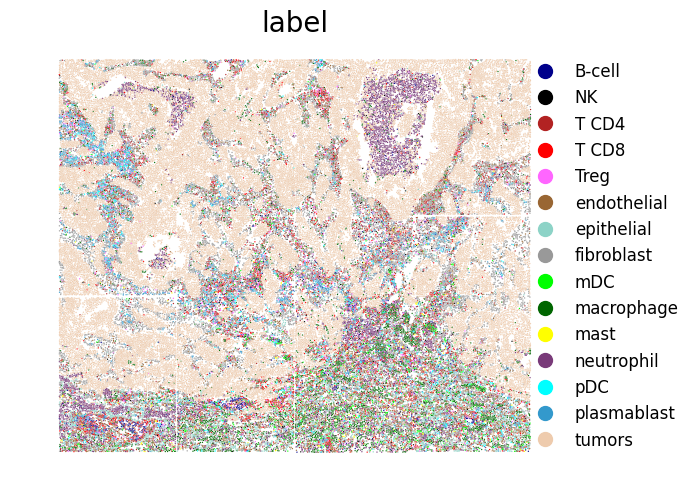

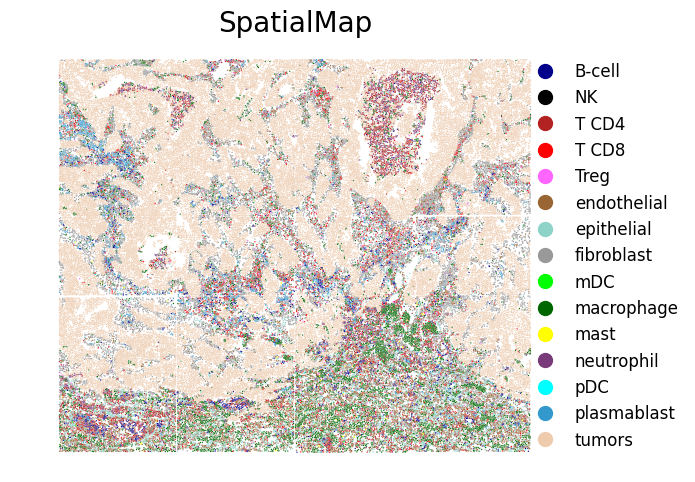

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

adata.obs['SpatialMap']=pre

x = adata.obs['x']
y = adata.obs['y']

targets = ['label', 'SpatialMap']

unique_categories =['B-cell', 'NK', 'T CD4', 'T CD8', 'Treg', 'endothelial', 'epithelial', 'fibroblast', 'mDC', 'macrophage', 'mast', 'neutrophil', 'pDC', 'plasmablast', 'tumors']

category_color_mapping={'tumors': '#eecbad',               
                         'epithelial':'#8dd3c7',
                         'neutrophil': '#793a79',
                         'fibroblast': '#999999',
                         'endothelial': '#996633',
                         'T CD8': '#ff0000',
                         'B-cell': '#00008b',
                         'T CD4': '#b22222',
                         'NK': '#000000',
                         'macrophage': '#006600',
                         'plasmablast':'#3399cc',
                         'Treg': '#ff66ff',
                         'mDC': '#00ff00',
                         'pDC': '#00ffff',
                         'mast': '#ffff00',}

legend_handles = [
    plt.Line2D([0], [0], marker='o', color=category_color_mapping[cat], 
               markersize=10, linestyle='', label=cat)
    for cat in unique_categories
]

for target in targets:
    plt.figure(figsize=(7, 5))
    plt.box(False)
    sns.scatterplot(
        x=x, 
        y=y, 
        hue=adata.obs[target],  
        palette=category_color_mapping, 
        s=1,  
        alpha=1
    )
    plt.title(target, fontsize=20)
    plt.axis('equal')
    
    plt.xlabel("")
    plt.ylabel("")
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False
    )
        
    plt.legend(
        handles=legend_handles,
        loc='center right',
        bbox_to_anchor=(1.2, 0.5),
        fontsize=12,
        frameon=False
    )
    
    plt.tight_layout()
    plt.show()